In [1]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data
scaled_data = scaler.fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
df_scaled_market_data = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Set the coinid column as index
df_scaled_market_data.index = df_market_data.index

# Display sample data
df_scaled_market_data.head()

# Save the scaled data to a new CSV file
df_scaled_market_data.to_csv("Resources/scaled_crypto_market_data.csv")

---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [8]:
os.environ['OMP_NUM_THREADS'] = '1'

# Create an empty list to store the inertia values
inertia_original = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

# Loop over the list of k values
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
        
    # 2. Fit the model to the data using df_scaled_market_data
    kmeans.fit(df_scaled_market_data)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_original.append(kmeans.inertia_)


c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

In [9]:

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia_original
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.888518
6,7,43.914690
7,8,37.517032
8,9,32.485241
9,10,28.222899


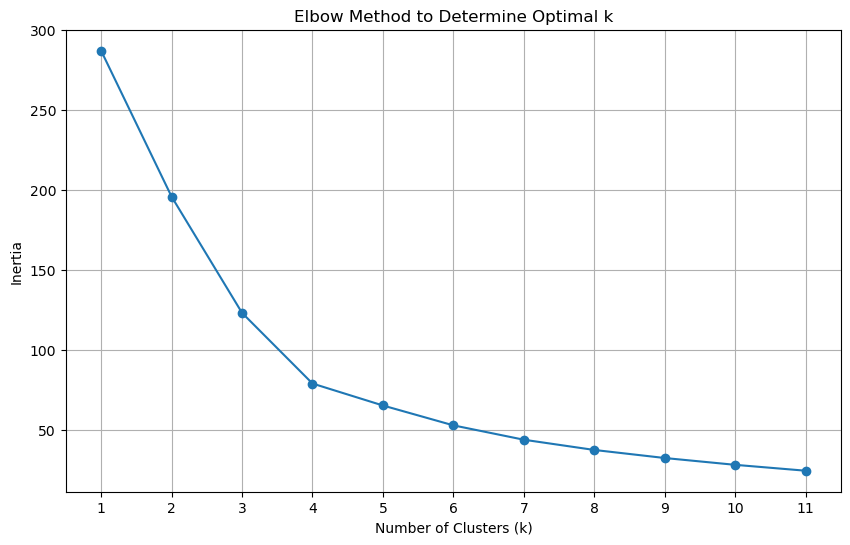

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Looking at the given inertia values, the decrease in inertia is steep initially but starts to slow down significantly after 𝑘 = 4
From 𝑘 = 1 k=1 to 𝑘 = 2 k=2, there is a large drop in inertia (287.00 to 195.82).
From 𝑘=2 k=2 to 𝑘 = 3 k=3, the drop is still significant (195.82 to 123.19).
From 𝑘=3 k=3 to 𝑘=4 k=4, the drop is noticeable (123.19 to 79.02).
From 𝑘=4 k=4 to 𝑘=5 k=5, the decrease starts to slow down (79.02 to 65.30).
Beyond 𝑘=5 k=5, the rate of decrease in inertia further diminishes.

The best value for 𝑘 is 4. This is because, at 𝑘=4 the inertia drops significantly compared to and the rate of decrease in inertia starts to slow down, indicating that additional clusters beyond k=4 do not provide substantial improvements in clustering quality.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=0)

In [12]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_scaled_market_data)

c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=0)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(df_scaled_market_data)

# Print the resulting array of cluster values
print(cluster_labels)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [14]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_copy['Cluster'] = cluster_labels

# Display sample data
df_market_data_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,3
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,3
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create the scatter plot using hvPlot
scatter_plot = df_market_data_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',
    colormap='Category10',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters by Price Change Percentages',
    xlabel='24h Price Change Percentage',
    ylabel='7d Price Change Percentage'
)

# Display the plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
df_pca = pca.fit_transform(df_scaled_market_data)

# View the first five rows of the DataFrame. 
# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

# Add the cluster labels to the PCA DataFrame
df_pca['Cluster'] = cluster_labels

# Add the coin_id to the PCA DataFrame for identification
df_pca['coin_id'] = index=df_market_data.index
# Display the first few rows of the PCA DataFrame
df_pca.head()


,PC1,PC2,PC3,Cluster,coin_id
0,-0.600667,0.842760,0.461595,0,bitcoin
1,-0.458261,0.458466,0.952877,0,ethereum
2,-0.433070,-0.168126,-0.641752,3,tether
3,-0.471835,-0.222660,-0.479053,3,ripple
4,-1.157800,2.041209,1.859715,0,bitcoin-cash


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

explained_variance = pca.explained_variance_ratio_

# Display the explained variance
print("Explained Variance Ratio for each Principal Component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.2%}")


Explained Variance Ratio for each Principal Component:
PC1: 37.20%
PC2: 34.70%
PC3: 17.60%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Explained Variance Ratios
PC1: 37.20%
PC2: 34.70%
PC3: 17.60%
Calculation
To get the total explained variance, sum these percentages:

Total Explained Variance = 37.20% + 34.70% + 17.60%
Total Explained Variance = 89.50%
The total explained variance of the three principal components is 89.50%.

In [20]:
# Create a new DataFrame with the PCA data.
# Copy the crypto names from the original data

# Fit the PCA model to the scaled data and transform the data
df_pca = pca.fit_transform(df_scaled_market_data)

# Create a DataFrame with the PCA results
# Set the coinid column as index
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# Add the cluster labels to the PCA DataFrame
df_pca['Cluster'] = cluster_labels

# Display sample data
df_pca.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1, 12))

In [22]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(df_pca)
    inertia_pca.append(kmeans.inertia_)

c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

In [23]:
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame({'k': k_values, 'inertia': inertia_pca})


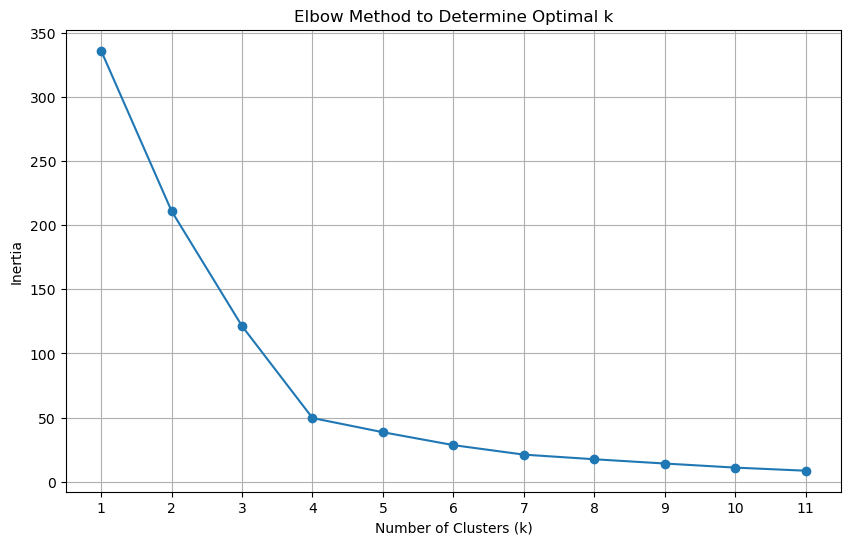

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [25]:
# Display the inertia values
df_elbow

,k,inertia
0,1,335.849695
1,2,210.909844
2,3,121.281081
3,4,49.665497
4,5,38.584870
5,6,28.535270
6,7,21.134056
7,8,17.532184
8,9,14.204872
9,10,11.022416


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
The best value for k when using the PCA data is 4. This is determined by the Elbow Method, where a significant drop in inertia occurs up to 
k=4, and after this point, the rate of decrease in inertia starts to slow down.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  No, the best k value does not differ from the best k value found using the original data. In both cases, the optimal number of clusters is determined to be 4. This indicates that the clustering structure of the data remains consistent whether using the original data or the PCA-transformed data, suggesting that the key patterns in the data are well-captured by the principal components.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)

In [27]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_pca)

c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=0)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
# Print the resulting array of cluster values.
cluster_labels = kmeans.predict(df_pca)
cluster_labels

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1])

In [29]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['Cluster'] = cluster_labels

# Display sample data
df_pca_copy.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [30]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Add the crypto names to the DataFrame for the hover information
df_pca_copy['coin_id'] = df_market_data.index

# Create the scatter plot using hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',
    colormap='Category10',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters by PCA Components',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)'
)

# Display the plot
scatter_plot

:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [31]:
# Composite plot to contrast the Elbow curves
# Create DataFrames for the elbow curves
# Compute inertia for the original data


# Create DataFrames for the elbow curves
df_elbow_original = pd.DataFrame({'k': k_values, 'inertia': inertia_original})
df_elbow_pca = pd.DataFrame({'k': k_values, 'inertia': inertia_pca})


# Fit K-Means on the original data using the best k
best_k = 4
kmeans_original = KMeans(n_clusters=best_k, n_init=10, random_state=0)
cluster_labels_original = kmeans_original.fit_predict(df_scaled_market_data)

# Create a DataFrame for the original data clusters
df_original_clusters = pd.DataFrame(df_scaled_market_data, columns=df_market_data.columns, index=df_market_data.index)
df_original_clusters['Cluster'] = cluster_labels_original

# Fit K-Means on the PCA data using the best k
kmeans_pca = KMeans(n_clusters=best_k, n_init=10, random_state=0)
cluster_labels_pca = kmeans_pca.fit_predict(df_pca)

# Create a DataFrame for the PCA data clusters
df_pca_copy = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)
df_pca_copy['Cluster'] = cluster_labels_pca



c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


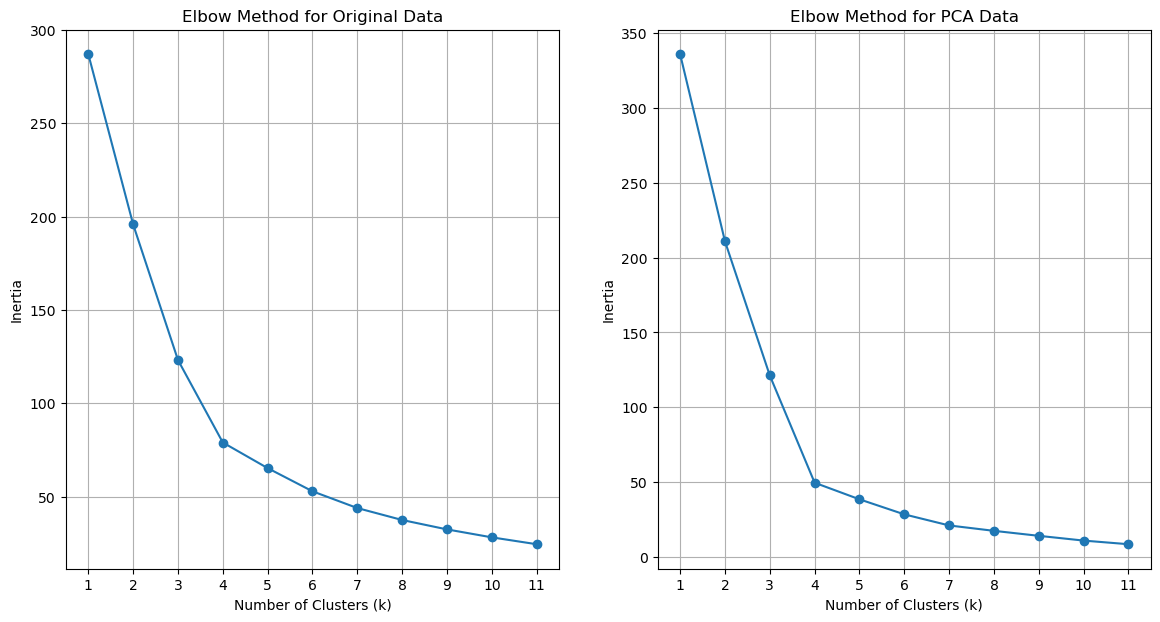

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster)

In [33]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

# Plot the elbow curves
plt.figure(figsize=(14, 7))

# Elbow curve for the original data
plt.subplot(1, 2, 1)
plt.plot(df_elbow_original['k'], df_elbow_original['inertia'], marker='o')
plt.title('Elbow Method for Original Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Elbow curve for the PCA data
plt.subplot(1, 2, 2)
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.title('Elbow Method for PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.show()

# Scatter plot for the original data clusters
scatter_plot_original = df_original_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',
    colormap='Category10',
    hover_cols=['Cluster'],
    title='Cryptocurrency Clusters by Original Data',
    xlabel='24h Price Change Percentage',
    ylabel='7d Price Change Percentage'
)

# Scatter plot for the PCA data clusters
scatter_plot_pca = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',
    colormap='Category10',
    hover_cols=['Cluster'],
    title='Cryptocurrency Clusters by PCA Components',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)'
)

# Composite plot to contrast the clusters
scatter_plot_composite = scatter_plot_original + scatter_plot_pca
scatter_plot_composite.cols(2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features, achieved by applying PCA, simplifies the data while retaining most of the important information (89.5% of the variance). This results in more distinct and interpretable clusters, makes the clustering process more efficient, and enhances the clarity of visualizations. Despite reducing the number of features, the underlying clustering structure remains consistent, showing that essential patterns in the data are preserved. The elbow curves for both the original and PCA-transformed data show a similar pattern, suggesting that the optimal number of clusters is the same (k=4). This indicates that the underlying clustering structure of the data is consistent, even with fewer features. The scatter plots of the clusters show that the PCA-transformed data provides a clearer visualization of the clusters. The clusters in the PCA-transformed data are more distinct and easier to interpret compared to those in the original data.